# Instagram Brand Alignment analysis 



In [1]:
import pandas as pd
import numpy as np
import spacy
from scipy.stats import zscore
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob 
import re

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords as nltk_stopwords

: 

In [30]:


insta_path ='../output/instagram'
insta_csv = glob.glob(os.path.join(insta_path, '*.csv'))
brand_value = pd.read_csv("../output/Brands  - Sheet1.csv")
brand_map_to_files = {
    'esteelauder.csv': 'Estée Lauder',
    'corsx.csv': 'Corsx',
    'etude.csv': 'Etude House',
    'fentybeauty.csv': 'Fenty Beauty',
    'glossier.csv': 'Glossier',
    'innisfree.csv': 'Innisfree',
    'laneige.csv': 'Laneige',
    'sulwhasoo.csv': 'Sulwhasoo',
    'tarte.csv': 'Tarte Cosmetics'
}
data_frames = []
for file in insta_csv:
    df = pd.read_csv(file, low_memory=False)

    filename = os.path.basename(file)
    # Add brand column using the mapping
    df['brand'] = brand_map_to_files[filename]
    data_frames.append(df)

insta_df = pd.concat(data_frames)

















In [33]:

brand_value.columns = brand_value.columns.str.strip().str.lower()
insta_df.columns = insta_df.columns.str.strip().str.lower()
insta_df = insta_df[insta_df['brand'].notna()]

custom_stopwords = []
stopword_set = set(nltk_stopwords.words('english')).union(custom_stopwords)

def clean_instagram_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
    # remove non-alphabetic characters 
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"u/\w+", "", text)  # remove Reddit usernames
    text = re.sub(r"@\w+|#\w+", "", text)  # remove Twitter-style mentions/hashtag
    text = re.sub(r"\*+", "", text) # removing markdown bold 
    tokens = word_tokenize(text)
    filtered_tokens = [t for t in tokens if t.isalpha() and t not in stopword_set]
    return " ".join(filtered_tokens)



insta_df["cleaned_text"] = insta_df["text"].apply(clean_instagram_text)




In [34]:


brand_value = brand_value.rename(columns={"brand": "brand", "values/ mission": "brand_mission"})


merged_df = insta_df.merge(
    brand_value[["brand", "brand_mission"]],
    left_on="brand",
    right_on="brand",
    how="inner"
)
merged_df["brand"].unique()



merged_df.head()




,content_type,creation_time,hashtags,id,is_branded_content,lang,match_type,mcl_url,modified_time,multimedia,...,post_owner.name,post_owner.username,statistics.comment_count,statistics.like_count,statistics.views,statistics.views_date_last_refreshed,text,brand,cleaned_text,brand_mission
0,albums,2025-05-29T13:40:32+00:00,NaN,9.037049e+15,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-05-29T14:09:23+00:00,"[{""id"":""1195280392333492"",""type"":""photo"",""url""...",...,NykaaLuxe,nykaaluxe,0.0,5.0,NaN,NaN,Every makeup look starts with the right founda...,Estée Lauder,every makeup look starts right foundation read...,A force is an influence. A force of nature. A ...
1,videos,2025-05-29T11:00:00+00:00,"[""esteelauder"",""esteelauderph""]",6.776383e+14,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-05-29T11:42:48+00:00,"[{""id"":""677638275152084"",""type"":""video"",""durat...",...,Estée Lauder Philippines Market,esteelauderph,0.0,9.0,258.0,2025-05-29,"Rose-tinted beauty, made to flatter every look...",Estée Lauder,rose tinted beauty made flatter every look whe...,A force is an influence. A force of nature. A ...
2,videos,2025-05-29T10:11:30+00:00,NaN,6.640465e+14,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-05-29T11:16:00+00:00,"[{""id"":""664046526456955"",""type"":""video"",""durat...",...,ION Orchard,ion_orchard,0.0,6.0,558.0,2025-05-29,A Day Like No Other is coming on 6 June! Enjoy...,Estée Lauder,day like coming june enjoy special partner reb...,A force is an influence. A force of nature. A ...
3,albums,2025-05-28T13:00:25+00:00,"[""palmbeach"",""modernluxuryinteriors"",""modernlu...",2.187097e+15,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-05-28T13:11:41+00:00,"[{""id"":""1215820702879124"",""type"":""photo"",""url""...",...,Modern Luxury,modernluxury,66.0,3217.0,58152.0,2025-05-29,Aerin Lauder cultivates an elegant legacy in f...,Estée Lauder,aerin lauder cultivates elegant legacy full bl...,A force is an influence. A force of nature. A ...
4,videos,2025-05-28T11:00:00+00:00,"[""est\u00e9eessentials"",""esteelauder"",""esteela...",1.230348e+15,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-05-29T00:10:07+00:00,"[{""id"":""1230348168650378"",""type"":""video"",""dura...",...,Estée Lauder Philippines Market,esteelauderph,1.0,17.0,828.0,2025-05-29,Beauty that moves with ease — through coffee r...,Estée Lauder,beauty moves ease coffee runs quiet moments ev...,A force is an influence. A force of nature. A ...


In [35]:
# Compute alignment score

def get_alignment_score(row):
    key_columns = [str(row["brand_mission"]), str(row["cleaned_text"])]
    vectorizer = TfidfVectorizer(stop_words="english")
    tfidf = vectorizer.fit_transform(key_columns)
    return cosine_similarity(tfidf[0], tfidf[1])[0][0] 
    #1 is perfectly align 
    #0 is no alignment 

merged_df["alignment_score"] = merged_df.apply(get_alignment_score, axis = 1)

merged_df["brand"].unique()



array(['Estée Lauder', 'Laneige', 'Tarte Cosmetics', 'Innisfree',
       'Glossier', 'Fenty Beauty', 'Sulwhasoo'], dtype=object)

In [36]:
merged_df["z_score"] = merged_df.groupby("brand")["alignment_score"].transform(zscore)

insight = merged_df.groupby("brand").agg(
    mean_alignment = ("alignment_score", "mean"), 
    mean_z_alignment = ("z_score", "mean")).reset_index()

insight 

,brand,mean_alignment,mean_z_alignment
0,Estée Lauder,0.025393,1.324623e-16
1,Fenty Beauty,0.088370,-9.516981e-17
2,Glossier,0.036020,-9.115369e-18
3,Innisfree,0.032621,-7.838047e-17
4,Laneige,0.035848,5.872325e-17
5,Sulwhasoo,0.082627,-8.622551e-17
6,Tarte Cosmetics,0.036278,8.294918e-17


In [37]:
top_alignment_comment = merged_df.sort_values("alignment_score", ascending=False).drop_duplicates("brand")
top_alignment_comment["alignment_type"] = "Top Aligned"

low_alignment_comment = merged_df.sort_values("alignment_score", ascending=True).drop_duplicates("brand")
low_alignment_comment["alignment_type"] = "Lowest Aligned"

both_df = pd.concat([top_alignment_comment, low_alignment_comment]).sort_values(["brand", "alignment_type"])

both_df

,content_type,creation_time,hashtags,id,is_branded_content,lang,match_type,mcl_url,modified_time,multimedia,...,statistics.like_count,statistics.views,statistics.views_date_last_refreshed,text,brand,cleaned_text,brand_mission,alignment_score,z_score,alignment_type
16449,stories,2019-10-25T08:48:18+00:00,NaN,5.584369e+14,False,en,"[""multimedia_text""]",https://www.facebook.com/transparency-tools/co...,NaN,"[{""id"":""558436873743045"",""type"":""video"",""durat...",...,NaN,NaN,NaN,NaN,Estée Lauder,,A force is an influence. A force of nature. A ...,0.000000,-1.324441,Lowest Aligned
719,videos,2025-03-08T13:00:14+00:00,"[""iwd2025"",""internationalwomensday""]",4.155643e+15,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-03-09T18:00:25+00:00,"[{""id"":""4155643074719468"",""type"":""video"",""dura...",...,83.0,5374.0,2025-05-26,A force is an influence. A force of nature. A ...,Estée Lauder,force influence force nature force change foun...,A force is an influence. A force of nature. A ...,0.643885,32.259794,Top Aligned
122527,videos,2024-06-25T12:29:16+00:00,"[""wake2slay"",""fentybeautybyrihanna"",""ucgcreato...",6.901911e+14,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2025-02-14T06:37:23+00:00,"[{""id"":""690191093723135"",""type"":""video"",""durat...",...,206.0,16243.0,2025-05-26,I love these cream lip glosses from @fentybeau...,Fenty Beauty,love cream lip glosses repost content without ...,FENTY BEAUTY: This is where Rihanna started it...,0.000000,-1.289093,Lowest Aligned
122957,photos,2024-06-04T18:18:54+00:00,"[""savagexfenty"",""fentyskin"",""fentyhair"",""rihan...",1.860353e+15,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-06-04T18:19:44+00:00,"[{""id"":""1860353111432473"",""type"":""photo"",""url""...",...,NaN,37747.0,2025-05-26,Rihanna’s Fenty lines so far:\n• Fenty Hair\n•...,Fenty Beauty,rihanna fenty lines far fenty hair fenty beaut...,FENTY BEAUTY: This is where Rihanna started it...,0.448270,5.250015,Top Aligned
83020,albums,2024-03-10T19:19:22+00:00,"[""thatgirlaesthetic"",""cleangirlaesthetic"",""sof...",6.836886e+14,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-04-27T07:11:36+00:00,"[{""id"":""1736727487248879"",""type"":""photo"",""url""...",...,339.0,33328.0,2025-05-26,Bits n bobs🪽✨\n\n@gisou @emijayinc @summerfrid...,Glossier,bits n bobs,"Before we launched Glossier in 2014, we starte...",0.000000,-0.773223,Lowest Aligned
87109,videos,2023-06-26T15:30:17+00:00,"[""skincare"",""beautyguru"",""makeupcollection"",""g...",6.339334e+14,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-05-03T10:30:22+00:00,"[{""id"":""633933356320360"",""type"":""video"",""durat...",...,195.0,45120.0,2025-05-26,"Skin first, makeup second 💋 @glossier #glossie...",Glossier,skin first makeup second,"Before we launched Glossier in 2014, we starte...",0.400461,7.823171,Top Aligned
66280,videos,2021-12-12T01:48:11+00:00,"[""skincare"",""makeupartist"",""makeupover40"",""cle...",2.407429e+16,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-10-14T09:48:21+00:00,"[{""id"":""24074293248844836"",""type"":""video"",""dur...",...,1106.0,NaN,NaN,Some skincare for my oily skin babes!! I love ...,Innisfree,skincare oily skin babes love using clay masks...,"innisfree, the pure island\nwhere clean nature...",0.000000,-0.921388,Lowest Aligned
73562,albums,2020-04-09T18:34:38+00:00,"[""fashionblogger"",""greentea"",""innisfree"",""skin...",1.485311e+15,False,en,"[""post_text""]",https://www.facebook.com/transparency-tools/co...,2024-11-07T01:56:35+00:00,"[{""id"":""676391328498948"",""type"":""photo"",""url"":...",...,265.0,NaN,NaN,"Innisfree, the pure island where clean nature ...",Innisfree,innisfree pure island clean nature healthy bea...,"innisfree, the pure island\nwhere clean nature...",0.729704,19.689543,Top Aligned
48128,photos,2019-10-03T05

In [38]:

pd.set_option("display.max_colwidth", None)
top_alignment_comment[["cleaned_text", "brand", "brand_mission", "alignment_score"]]


,cleaned_text,brand,brand_mission,alignment_score
73562,innisfree pure island clean nature healthy beauty coexist harmony innisfree eco friendly green life preserve balance nature gift jeju pure ingredients innisfree first natural brand korea dedicated sharing clean pure energy nature healthy beauty launched new branch,Innisfree,"innisfree, the pure island\nwhere clean nature and healthy beauty\ncoexist in harmony.\ninnisfree is a natural brand that shares the benefits of nature\nfrom the pristine island of Jeju for healthy beauty\nand pursues an eco-friendly green life to preserve the balance of nature",0.729704
719,force influence force nature force change founder mrs est e lauder force believed power women honour legacy today everything,Estée Lauder,"A force is an influence. A force of nature. A force for change.\nOur founder, Mrs. Estée Lauder, was a force who believed in the power of women.\nBeautiful Forces represents our mission as a force for good: the beauty of caring for\nthe world we live in and championing those who will help shape its future.",0.643885
122957,rihanna fenty lines far fenty hair fenty beauty fenty skin savage x fenty,Fenty Beauty,"FENTY BEAUTY: This is where Rihanna started it all, for all. More than just makeup, it’s a mission with a vision, serving foundation that put every tone on the map. Launching color that created new ways of being and seeing with loaded pigments and freestyle formulas. FENTY SKIN: Great skin makes great makeup. Start your base with Fenty Skin—smart, high-performance skincare with a clear mission: treat, smooth and tighten the look of pores, day and night, under makeup and over time. Never complicated, always clinical. FENTY HAIR: The radically transformative power of hair? Rihanna owns that. But serving looks and switchin’ styles can take its toll. Enter Fenty Hair: a new era of repair. It’s a line that infuses repair into every step for styles that won’t stop. Your hair on Fenty? It’s stronger by the style.",0.448270
161264,new generation first care activating serum whole new sulwhasoo powerful ever powered sulwhasoo master complex upgraded formula addition lyphanax ginseng undergone hours natural ripening first care activating serum vi activates skin abilities skin renewal strengthens skin barrier fast absorption formula penetrates quickly skin alleviate strain typically felt cleansing restore skin condition making essential first skincare routine take first step healthy radiant skin today,Sulwhasoo,"Sulwhasoo believes that there is an innovative artist in all of us.\nWe explore our heritage for inspiration and create new things that\nchallenges and changes perspectives.\nWe drew upon our own heritage to create new products that we see as work of art as\nthey transcend time and generations. At Sulwhasoo, we believe in a holistic approach to skincare.\nGoing beyond addressing visible issues on the skin’s surface, Sulwhasoo looks deeply into the root causes of skin aging and addressing them at the source.\nOur definition of genuine skin solutions involves the recovery of skin’s rejuvenating system.\nWe believe that activating the skin’s potential is the first step towards achieving healthy-looking skin.\nFor this, Sulwhasoo presents the skincare routine, starting with First Care Activating Serum, formulated to activate your skin’s potential.",0.407126
87109,skin first makeup second,Glossier,"Before we launched Glossier in 2014, we started as Into The Gloss. A beauty website and community devoted to sharing real information with real people, about really amazing products. It’s where we realized that beauty shouldn’t be built in a boardroom—it should be built by you. This ethos gave birth to our philosophy: Skin First. Makeup Second™. We prioritize skincare because we believe that healthy skin is the best foundation. We believe in thoughtful design and cultivating conversations. It’s at the core of everything we do—the starting point of all our makeup, skincare, bodycare, and 

In [40]:
# Categorize the brands base on country

insight["country"] = "US Brand"

korean_brands = ["COSRX", "Etude House", "Innisfree", "Laneige", "Sulwhasoo"]
insight.loc[
    insight["brand"].str.contains("|".join(korean_brands), case=False),
    "country"] = "Korean Brand" 

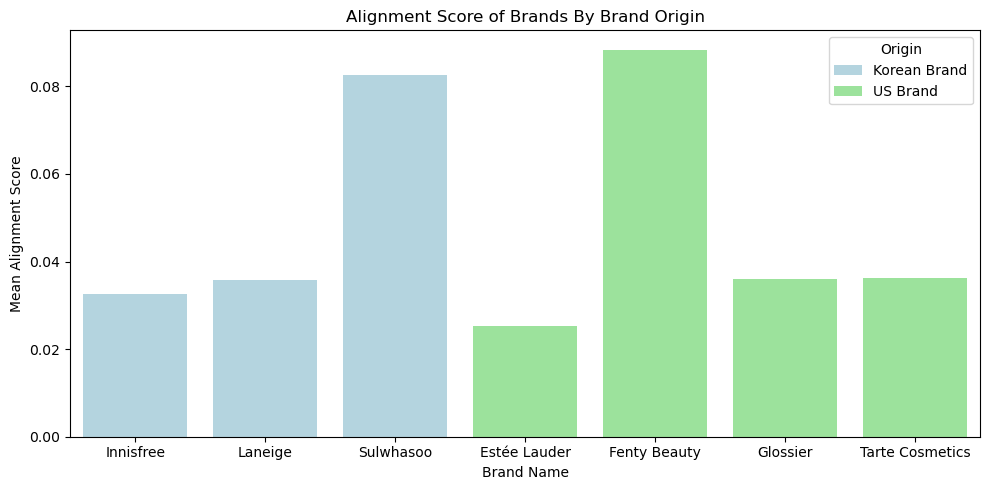

In [41]:
sorted_by_country = insight.sort_values(by=["country", "brand"])

plt.figure(figsize=(10, 5))
sns.barplot(data=sorted_by_country, x="brand", y="mean_alignment", hue="country", palette={"Korean Brand": "lightblue", "US Brand": "lightgreen"})

plt.title("Alignment Score of Brands By Brand Origin")
plt.xlabel("Brand Name")
plt.ylabel("Mean Alignment Score")
plt.legend(title="Origin")
plt.tight_layout()
plt.show()

## Main theme

In [44]:
# Extract top keywords from the brand's value and top keywords from the user's comment 

#function to clean the text 
def cleaning_the_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    return text

# function to extract keywords using FT-IDF 
def get_main_theme(text, top_n=7):
    if not text.strip():
        return None
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform([text])
    get_scores = tfidf_matrix.toarray().flatten() #convert text into TF-IDF-weighted vector 
    words = vectorizer.get_feature_names_out() # get a list of main theme 
    top_indices = get_scores.argsort()[::-1][:top_n]
    top_keywords = [words[keyword] for keyword in top_indices]
    return ", ".join(top_keywords)

#building a dataframe of main themes for each 
theme_df = []

for brand, group in merged_df.groupby("brand"):
    brand_mission = " ".join(group["brand_mission"].map(cleaning_the_text).unique())
    customer_comment = " ".join(group["cleaned_text"].map(cleaning_the_text))
    main_theme_brand = get_main_theme(brand_mission)
    main_theme_comment = get_main_theme(customer_comment)
    theme_df.append({
        "brand": brand,
        "brand_mission_main_theme": main_theme_brand,
        "user_comment_main_theme": main_theme_comment})

main_theme_df = pd.DataFrame(theme_df)

main_theme_df

,brand,brand_mission_main_theme,user_comment_main_theme
0,Estée Lauder,"force, world, women, beauty, believed, caring, championing","lauder, est, skin, beauty, night, foundation, makeup"
1,Fenty Beauty,"fenty, hair, makeup, skin, styles, new, repair","beauty, fenty, makeup, lip, gloss, skin, rihanna"
2,Glossier,"makeup, beauty, skin, built, products, real, believe","glossier, makeup, lip, hair, skin, beauty, mention"
3,Innisfree,"nature, healthy, beauty, island, innisfree, green, benefits","skin, innisfree, tea, green, serum, cream, mask"
4,Laneige,"skin, create, visible, ingredients, better, bouncy, caring","skin, laneige, lip, mask, sleeping, cream, water"
5,Sulwhasoo,"skin, sulwhasoo, create, potential, activating, addressing, heritage","skin, sulwhasoo, serum, ginseng, care, cream, activating"
6,Tarte Cosmetics,"tarte, ingredients, believe, vegan, blend, boundaries, breaking","tarte, cosmetics, beauty, makeup, palette, mascara, lip"
